In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Given Differential Equations

$$\frac{dy}{dx} = y - x$$
$$\frac{dy}{dx} = y - x^2$$

The analytical solutions to these equations can be computed by converting these into exact differentials using the integrating factor $\mu(x) = e^{-x}$. Solving these equations with the intial condition $y(0)$ gives us the solutions
$$y_1(x) = 1 + x + (y(0) - 1)e^x$$
$$y_2(x) = 2 + 2x + x^2 + (y(0) - 2)e^x$$

In [3]:
def f1(y, x):
    return y-x
def f2(y, x):
    return y - x**2
def sol1(x, y0):
    return 1 + x + (y0 - 1)*np.exp(x)
def sol2(x, y0):
    return 2 + 2*x + x**2 + (y0 - 2)*np.exp(x)

# Generating the Direction Fields
In this section we generate the direction fields for the given differential equations. These plots help us to visualise how to solutions of the differential equation will look, before actaully going about solving them.

In [4]:
xg = np.arange(-5, 5, 1)
yg = np.arange(-5, 5, 1)
X, Y = np.meshgrid(xg, yg)

In [5]:
dy1 = f1(Y, X)
dy2 = f2(Y, X)

In [6]:
dx1 = np.ones(dy1.shape)
dx2 = np.ones(dy2.shape)

In [7]:
norm1 = np.sqrt(dy1**2 + dx1**2)
norm2 = np.sqrt(dy2**2 + dx2**2)

In [8]:
dy1u = dy1/norm1
dx1u = dx1/norm1
dy2u = dy2/norm2
dx2u = dx2/norm2

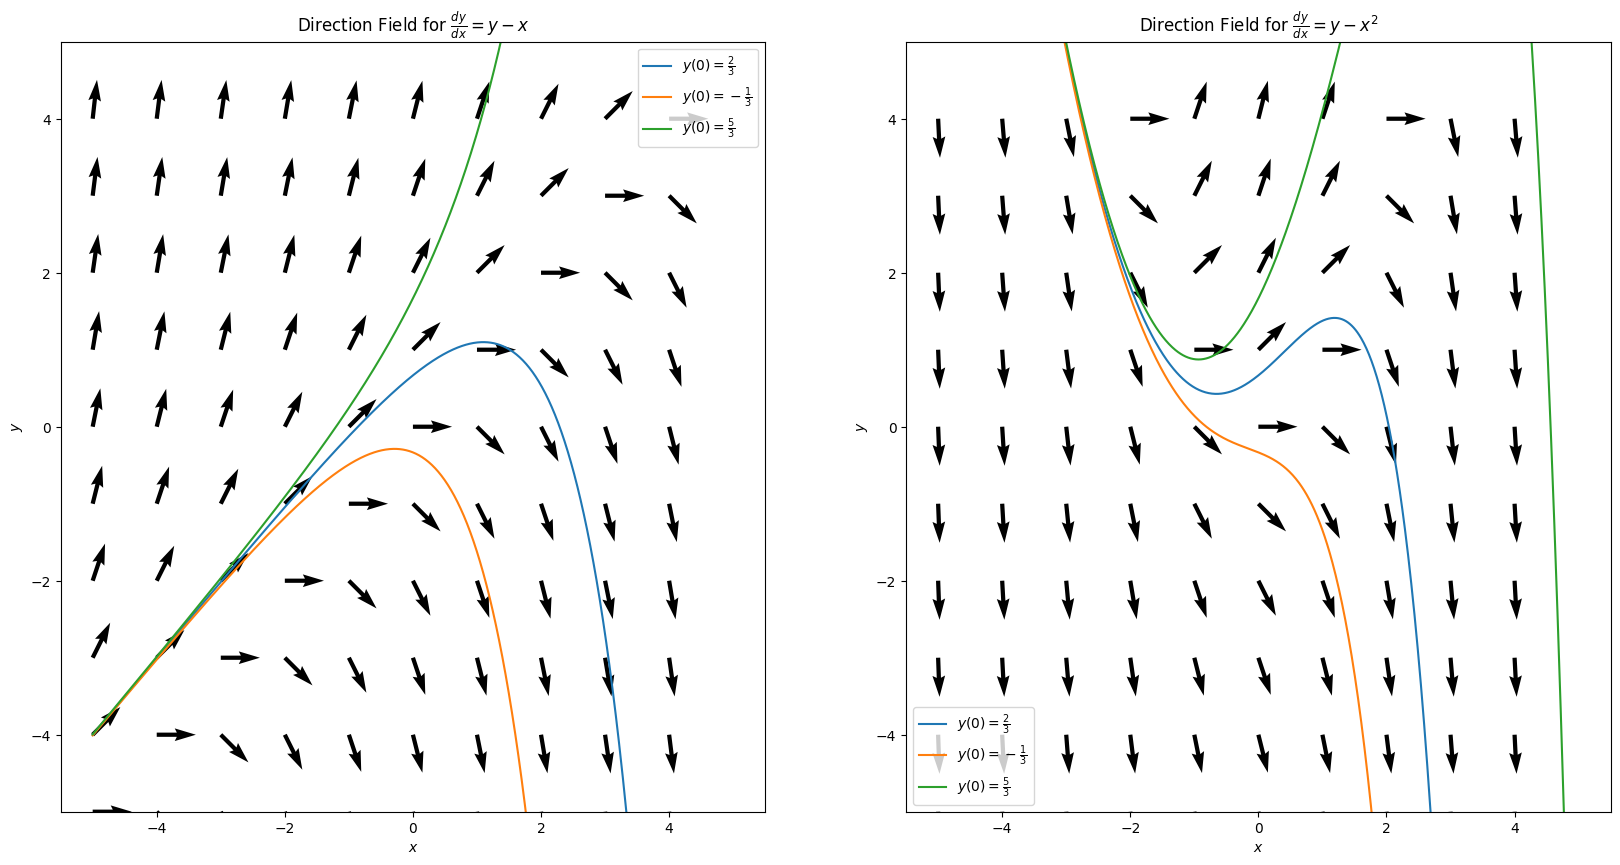

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
xs = np.linspace(-5, 5, 1000)
ax = axes[0]
ax.quiver(X, Y, dx1u, dy1u)
ax.plot(xs, sol1(xs, 2/3), label=r"$y(0) = \frac{2}{3}$")
ax.plot(xs, sol1(xs, -1/3), label=r"$y(0) = -\frac{1}{3}$")
ax.plot(xs, sol1(xs, 5/3), label=r"$y(0) = \frac{5}{3}$")
ax.set_ylim(-5, 5)
ax.legend()
ax.set_title(r"Direction Field for $\frac{dy}{dx} = y - x$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax = axes[1]
ax.set_title(r"Direction Field for $\frac{dy}{dx} = y - x^2$")
ax.quiver(X, Y, dx2u, dy2u)
ax.plot(xs, sol2(xs, 2/3), label=r"$y(0) = \frac{2}{3}$")
ax.plot(xs, sol2(xs, -1/3), label=r"$y(0) = -\frac{1}{3}$")
ax.plot(xs, sol2(xs, 5/3), label=r"$y(0) = \frac{5}{3}$")
ax.set_ylim(-5, 5)
ax.legend(loc="lower left")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
fig.savefig("direction_fields.png", dpi=150)

# Implementing the ODE Solvers
In this section we implement the ODE solvers to compare them using the given differential equations. We will consider the differential equation given by the following equation and initial condition:
$$\boxed{\frac{dy}{dx} = f(x, y),~~y(x_0) = y_0}$$

## Forward Euler Method
This is the simplestway to solve ODEs numerically. This is a first order method. As in, the error in it grows as the square of the step size. The motivation for it has been shown below.

Let $y(x)$ be a smooth function. Then, from its taylor expansion we have
\begin{align*}
    &y(x + h) = y(x) + y'(x)h + \sum_{n = 2}^{\infty}y^{(n)}(x)h^n \\
    \Rightarrow &y(x + h) = y(x) + y'(x)h + \mathcal{O}(h^2) \\
    \Rightarrow &y(x + h) = y(x) + y'(x)h \tag{Ignoring the second order terms}
\end{align*}
This gives us the expression for iteratively calculating $y(x)$ using the forward Euler Method:
$$y(x + h) = y(x) + hf(x, y)$$
Denoting them in terms of $x_n$ and $y_n$ we get the following expression:
$$\boxed{y_{n+1} = y_n + hf(x_n, y_n)}$$


## Runge-Kutta Methods
Runge-Kutta methods are a family of iterative methods to solve ODEs which were first introduced in the 1900s. These methods improve upon the Forward Euler Method by considering intermediate slopes to achieve higher accuracy. The Runge-Kutta methods implemented here have been discussed in further detail below.
### Second Order
The most commonly used second order Runge-Kutta method is the midpoint method, where we improve upon the Euler Method using the slope of the midpoint. The algorithm goes as follows. Given a step-size of $h > 0$, in each iteration we define the following:
\begin{align*}
    k_1 &= f(x_n , y_n) \\
    k_2 &= f\left(x_n + \frac{h}{2}, y_n + \frac{h}{2}k_1\right)
\end{align*}

Now using these values we calculate the next term in the iteration using the following expression:

$$y_{n + 1} = y_n + hk_2$$

Substituting the value of $k_2$ in this expression we get:

$$\boxed{y_{n + 1} = y_n + hf\left(x_n + \frac{h}{2}, y_n + \frac{h}{2}f(x_n , y_n)\right)}$$
### Fourth Order
The fourth order Runge-Kutta Method, also known as the classic Runge-Kutta Method is the most widely known member of the Runge-Kutta Family, and is known as 'RK4'. The algorithm goes as follows. Given a step-size of $h > 0$, in each iteration we define the following:
\begin{align*}
    k_1 &= f(x_n, y_n) \\    
    k_2 &= f\left(x_n + \frac{h}{2}, y_n + \frac{h}{2}k_1\right) \\
    k_3 &= f\left(x_n + \frac{h}{2}, y_n + \frac{h}{2}k_2\right) \\
    k_4 &= f\left(x_n + h, y_n + hk_3\right) \\
\end{align*}

Now, using these intermediate slopes, we calculate the next term in the iteration using the following expression:

$$\boxed{y_{n + 1} = y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)}$$

RK4 is a fourth order method i.e. the error in the numerically obtained solution from the analytical solution is of the order of $\mathcal{O}(h^5)$.

In [9]:
def euler(f, y0, x0, x1, h):
    xs = np.arange(x0, x1+h, h)
    ys = np.zeros(xs.shape)
    ys[0] = y0
    for i in range(1, xs.shape[0]):
        ys[i] = ys[i-1] + h*f(ys[i - 1], xs[i - 1])
    return ys, xs

def RK2(f, y0, x0, x1, h, alpha=1/2):
    xs = np.arange(x0, x1 + h, h)
    ys = np.zeros(xs.shape)
    ys[0] = y0
    for i in range(1, xs.shape[0]):
        k1 = f(ys[i-1], xs[i-1])
        k2 = f(ys[i-1] + alpha*h*k1, xs[i-1] + alpha*h)
        ys[i] = ys[i-1] + h*((1 - (1/(2*alpha)))*k1 + (1/(2*alpha))*k2)
    return ys, xs

def RK4(f, y0, x0, x1, h):
    xs = np.arange(x0, x1 + h, h)
    ys = np.zeros(xs.shape)
    ys[0] = y0
    for i in range(1, xs.shape[0]):
        k1 = f(ys[i-1], xs[i-1])
        k2 = f(ys[i-1] + (h/2)*k1, xs[i-1] + h/2)
        k3 = f(ys[i-1] + (h/2)*k2, xs[i-1] + h/2)
        k4 = f(ys[i-1] + h*k3, xs[i-1] + h)
        ys[i] = ys[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return ys, xs

In [10]:
y0 = 2/3
x0 = 0
x1 = 5
h = 0.25

ys1, xs1 = euler(f1, y0, x0, x1, h)
ys2, xs2 = euler(f2, y0, x0, x1, h)
ys1_r, xs1_r = RK4(f1, y0, x0, x1, h)
ys2_r, xs2_r = RK4(f2, y0, x0, x1, h)
ys1_r2, xs1_r2 = RK2(f1, y0, x0, x1, h)
ys2_r2, xs2_r2 = RK2(f2, y0, x0, x1, h)

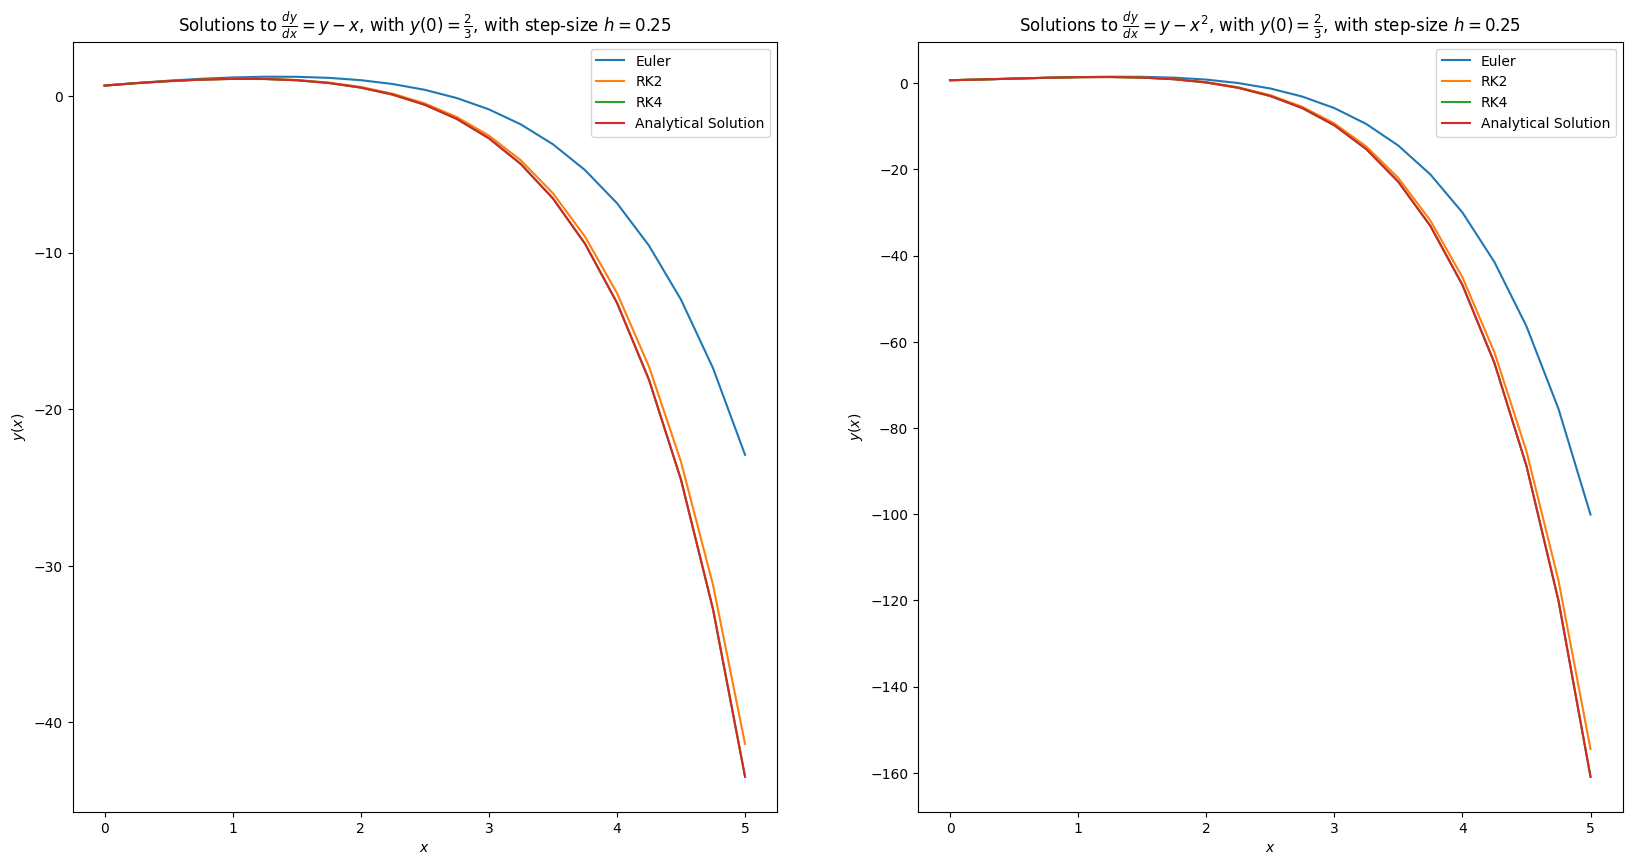

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
ax = axes[0]
ax.plot(xs1, ys1, label="Euler")
ax.plot(xs1_r2, ys1_r2, label="RK2")
ax.plot(xs1_r, ys1_r, label="RK4")
ax.plot(xs1, sol1(xs1, y0), label="Analytical Solution")
ax.legend()
ax.set_title(r"Solutions to $\frac{dy}{dx} = y - x$, with $y(0) = \frac{2}{3}$, with step-size $h = 0.25$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y(x)$")
ax = axes[1]
ax.plot(xs2, ys2, label="Euler")
ax.plot(xs2_r2, ys2_r2, label="RK2")
ax.plot(xs2_r, ys2_r, label="RK4")
ax.plot(xs2, sol2(xs2, y0), label="Analytical Solution")
ax.legend()
ax.set_title(r"Solutions to $\frac{dy}{dx} = y - x^2$, with $y(0) = \frac{2}{3}$, with step-size $h = 0.25$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y(x)$")
fig.savefig("solutions.png", dpi=150)

In [12]:
H = np.linspace(0.001, 1, 100)
errors = [[[], [], []], [[], [], []]]
for h in H:
    ye, xe = euler(f1, y0, x0, x1, h)
    err_e = np.mean(np.abs(ye - sol1(xe, y0)))
    errors[0][0].append(err_e)
    yr2, xr2 = RK2(f1, y0, x0, x1, h)
    err_r2 = np.mean(np.abs(yr2 - sol1(xr2, y0)))
    errors[0][1].append(err_r2)
    yr4, xr4 = RK4(f1, y0, x0, x1, h)
    err_r4 = np.mean(np.abs(yr4 - sol1(xr4, y0)))
    errors[0][2].append(err_r4)
    ye, xe = euler(f2, y0, x0, x1, h)
    err_e = np.mean(np.abs(ye - sol1(xe, y0)))
    errors[1][0].append(err_e)
    yr2, xr2 = RK2(f2, y0, x0, x1, h)
    err_r2 = np.mean(np.abs(yr2 - sol1(xr2, y0)))
    errors[1][1].append(err_r2)
    yr4, xr4 = RK4(f2, y0, x0, x1, h)
    err_r4 = np.mean(np.abs(yr4 - sol1(xr4, y0)))
    errors[1][2].append(err_r4)

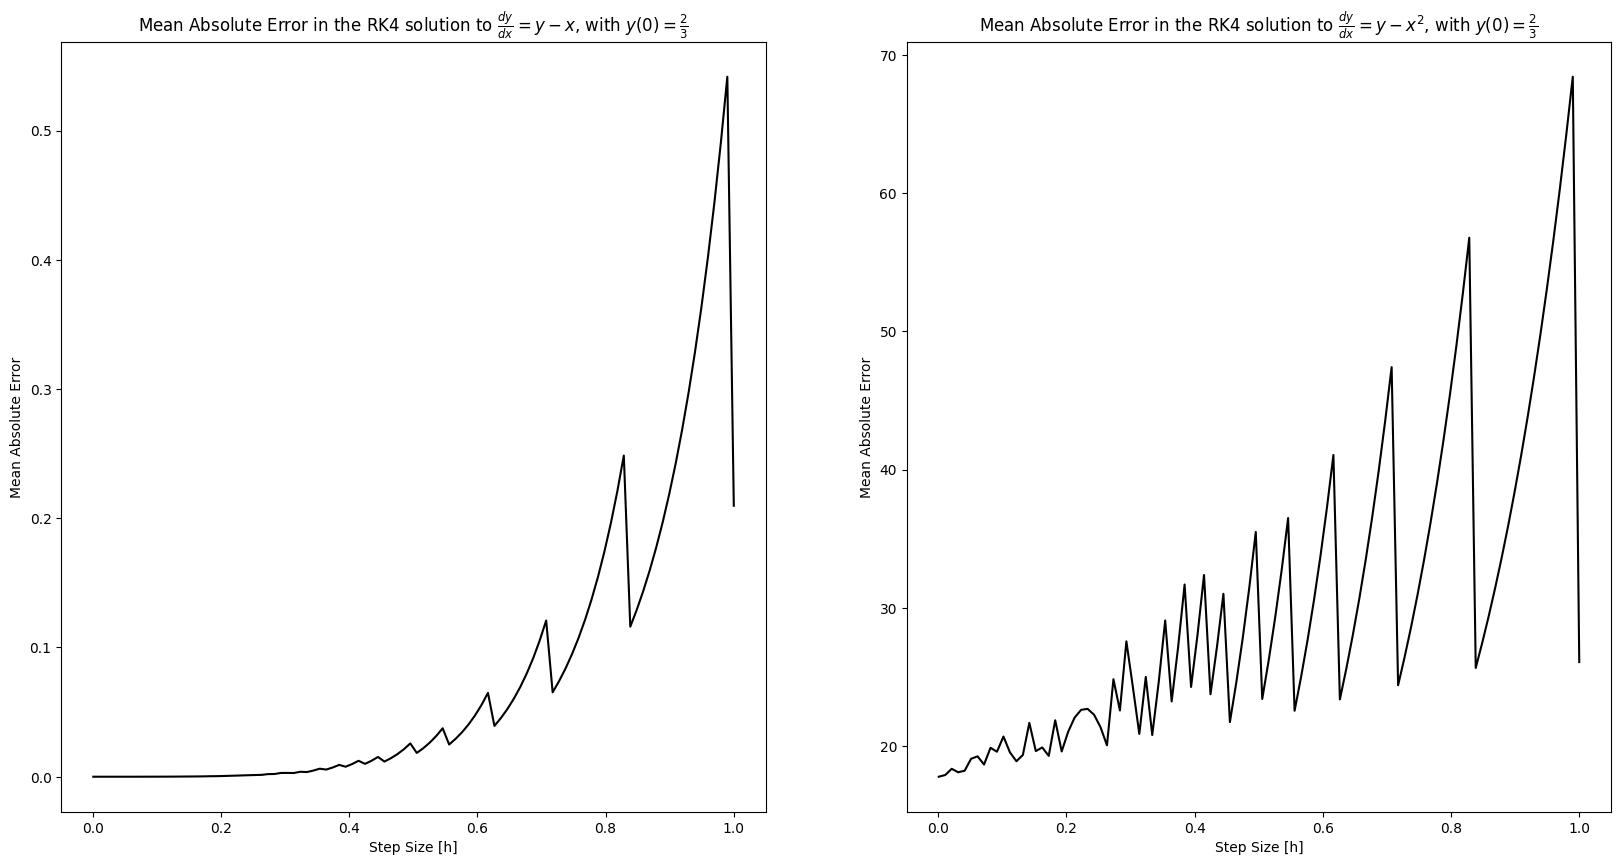

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
ax = axes[0]
# ax.scatter(H, errors[0], label="Euler")
# ax.scatter(H, errors[0][1], label="RK2")
ax.plot(H, errors[0][2], label="RK4", color="k")
# ax.legend()
ax.set_title(r"Mean Absolute Error in the RK4 solution to $\frac{dy}{dx} = y - x$, with $y(0) = \frac{2}{3}$")
ax.set_xlabel("Step Size [h]")
ax.set_ylabel("Mean Absolute Error")

ax = axes[1]
# ax.scatter(H, errors[1], label="Euler")
# ax.plot(H, errors[1][1], label="RK2")
ax.plot(H, errors[1][2], label="RK4", color="k")
# ax.legend()
ax.set_title(r"Mean Absolute Error in the RK4 solution to $\frac{dy}{dx} = y - x^2$, with $y(0) = \frac{2}{3}$")
ax.set_xlabel("Step Size [h]")
ax.set_ylabel("Mean Absolute Error")
fig.savefig("errors_rk4.png", dpi=150)

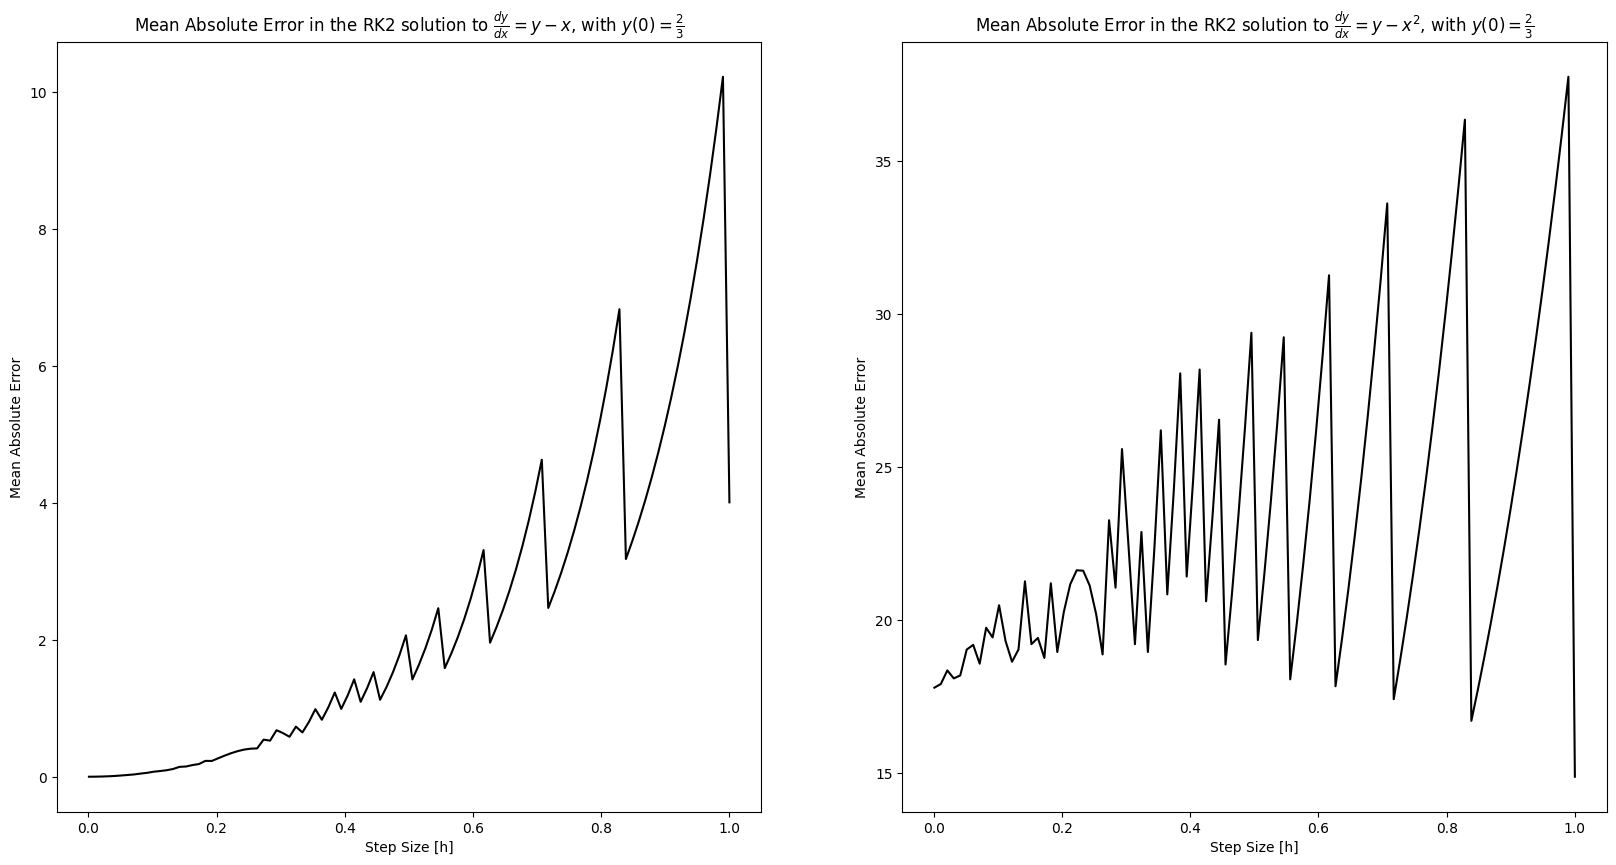

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
ax = axes[0]
# ax.scatter(H, errors[0], label="Euler")
ax.plot(H, errors[0][1], label="RK2", color="k")
# ax.plot(H, errors[0][2], label="RK4", color="k")
# ax.legend()
ax.set_title(r"Mean Absolute Error in the RK2 solution to $\frac{dy}{dx} = y - x$, with $y(0) = \frac{2}{3}$")
ax.set_xlabel("Step Size [h]")
ax.set_ylabel("Mean Absolute Error")

ax = axes[1]
# ax.scatter(H, errors[1], label="Euler")
ax.plot(H, errors[1][1], label="RK2", color="k")
# ax.plot(H, errors[1][2], label="RK4", color="k")
# ax.legend()
ax.set_title(r"Mean Absolute Error in the RK2 solution to $\frac{dy}{dx} = y - x^2$, with $y(0) = \frac{2}{3}$")
ax.set_xlabel("Step Size [h]")
ax.set_ylabel("Mean Absolute Error")
fig.savefig("errors_rk2.png", dpi=150)

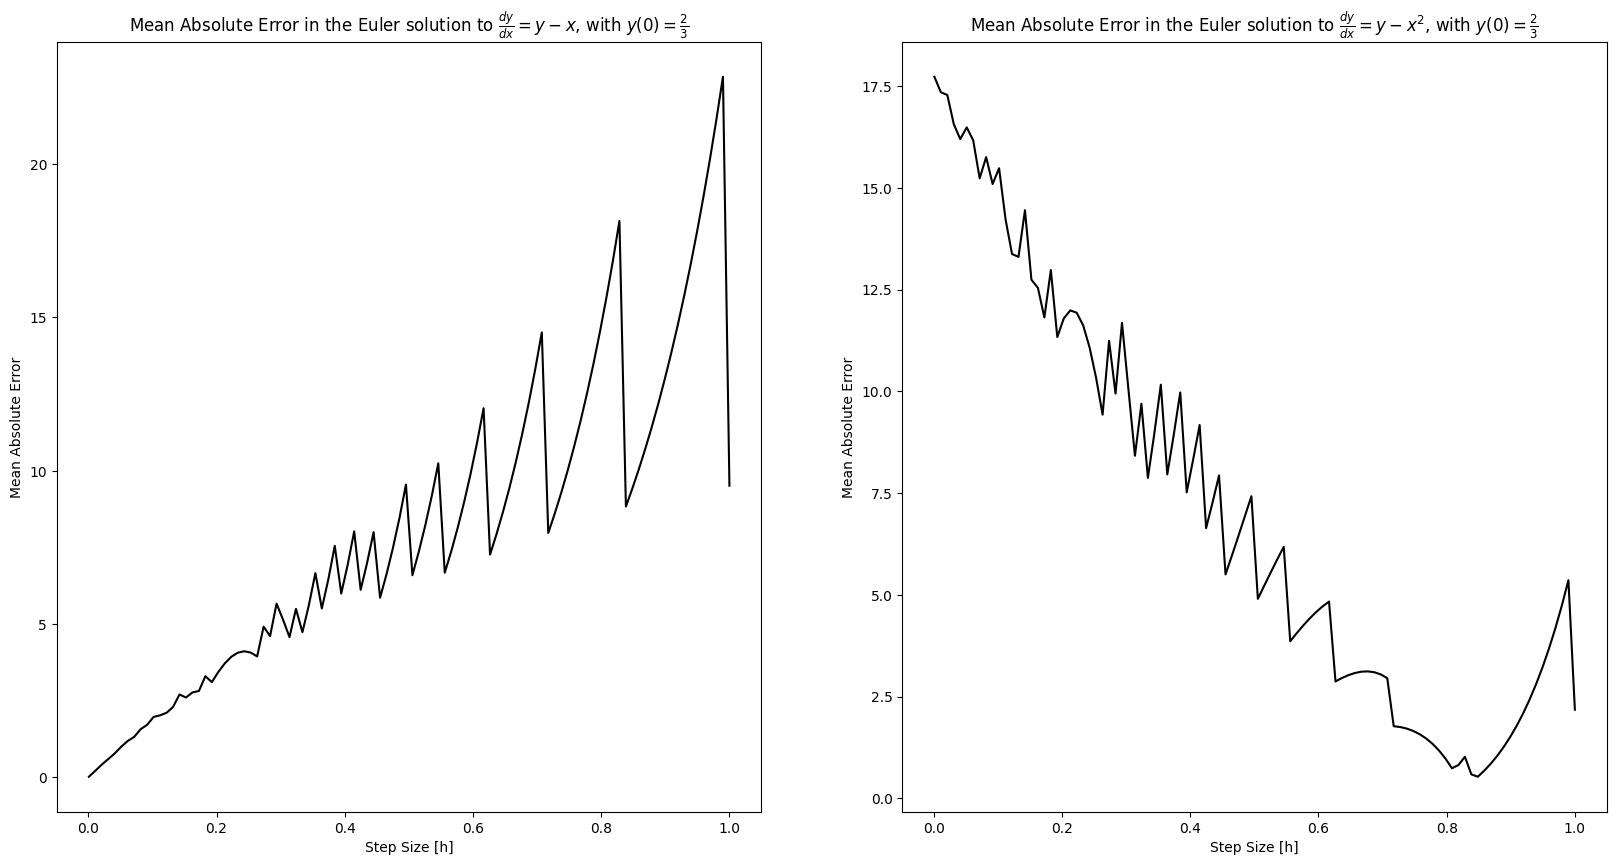

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
ax = axes[0]
ax.plot(H, errors[0][0], label="Euler", color="k")
# ax.plot(H, errors[0][1], label="RK2", color="k")
# ax.plot(H, errors[0][2], label="RK4", color="k")
# ax.legend()
ax.set_title(r"Mean Absolute Error in the Euler solution to $\frac{dy}{dx} = y - x$, with $y(0) = \frac{2}{3}$")
ax.set_xlabel("Step Size [h]")
ax.set_ylabel("Mean Absolute Error")

ax = axes[1]
ax.plot(H, errors[1][0], label="Euler", color="k")
# ax.plot(H, errors[1][1], label="RK2", color="k")
# ax.plot(H, errors[1][2], label="RK4", color="k")
# ax.legend()
ax.set_title(r"Mean Absolute Error in the Euler solution to $\frac{dy}{dx} = y - x^2$, with $y(0) = \frac{2}{3}$")
ax.set_xlabel("Step Size [h]")
ax.set_ylabel("Mean Absolute Error")
fig.savefig("errors_euler.png", dpi=150)

# Varying the Initial Conditions

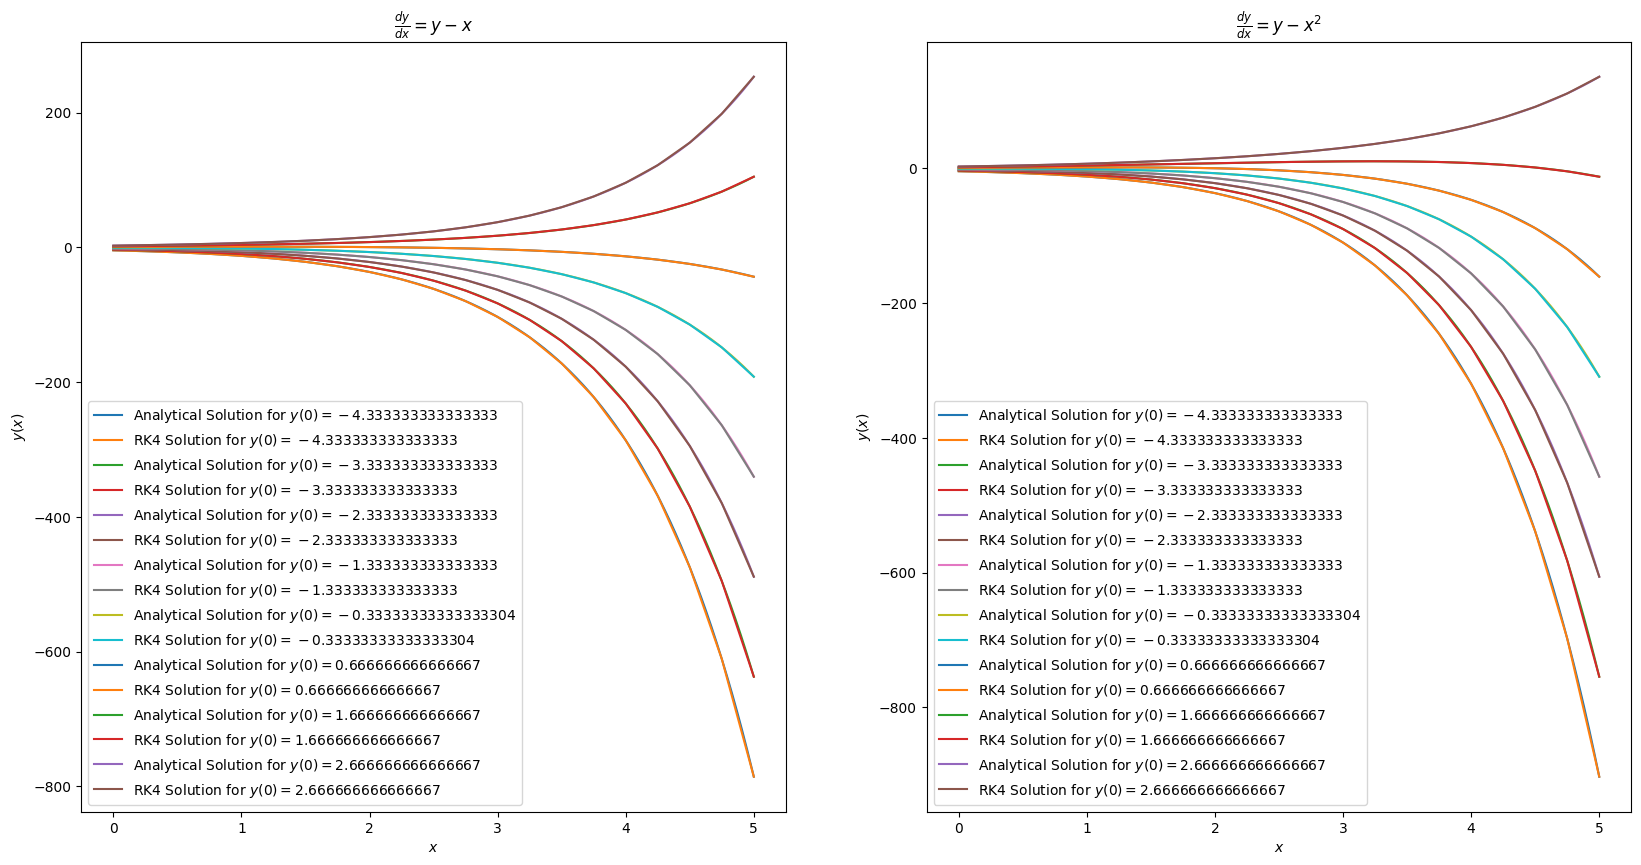

In [18]:
y0 = (2/3) - 5
x0 = 0
x1 = 5
h = 0.25
xsample = np.linspace(x0, x1, 500)
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
ax = axes[1]
ax.plot(xsample, sol2(xsample, y0), label=f"Analytical Solution for $y(0) = {y0}$")
ys, xs = RK4(f2, y0, x0, x1, h)
ax.plot(xs, ys, label=f"RK4 Solution for $y(0) = {y0}$")
y0 += 1
ax.plot(xsample, sol2(xsample, y0), label=f"Analytical Solution for $y(0) = {y0}$")
ys, xs = RK4(f2, y0, x0, x1, h)
ax.plot(xs, ys, label=f"RK4 Solution for $y(0) = {y0}$")
y0 += 1
ax.plot(xsample, sol2(xsample, y0), label=f"Analytical Solution for $y(0) = {y0}$")
ys, xs = RK4(f2, y0, x0, x1, h)
ax.plot(xs, ys, label=f"RK4 Solution for $y(0) = {y0}$")
y0 += 1
ax.plot(xsample, sol2(xsample, y0), label=f"Analytical Solution for $y(0) = {y0}$")
ys, xs = RK4(f2, y0, x0, x1, h)
ax.plot(xs, ys, label=f"RK4 Solution for $y(0) = {y0}$")
y0 += 1
ax.plot(xsample, sol2(xsample, y0), label=f"Analytical Solution for $y(0) = {y0}$")
ys, xs = RK4(f2, y0, x0, x1, h)
ax.plot(xs, ys, label=f"RK4 Solution for $y(0) = {y0}$")
y0 += 1
ax.plot(xsample, sol2(xsample, y0), label=f"Analytical Solution for $y(0) = {y0}$")
ys, xs = RK4(f2, y0, x0, x1, h)
ax.plot(xs, ys, label=f"RK4 Solution for $y(0) = {y0}$")
y0 += 1
ax.plot(xsample, sol2(xsample, y0), label=f"Analytical Solution for $y(0) = {y0}$")
ys, xs = RK4(f2, y0, x0, x1, h)
ax.plot(xs, ys, label=f"RK4 Solution for $y(0) = {y0}$")
y0 += 1
ax.plot(xsample, sol2(xsample, y0), label=f"Analytical Solution for $y(0) = {y0}$")
ys, xs = RK4(f2, y0, x0, x1, h)
ax.plot(xs, ys, label=f"RK4 Solution for $y(0) = {y0}$")
ax.set_title(r"$\frac{dy}{dx} = y - x^2$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y(x)$")
ax.legend()
y0 = 2/3 - 5

ax = axes[0]
ax.plot(xsample, sol1(xsample, y0), label=f"Analytical Solution for $y(0) = {y0}$")
ys, xs = RK4(f1, y0, x0, x1, h)
ax.plot(xs, ys, label=f"RK4 Solution for $y(0) = {y0}$")
y0 += 1
ax.plot(xsample, sol1(xsample, y0), label=f"Analytical Solution for $y(0) = {y0}$")
ys, xs = RK4(f1, y0, x0, x1, h)
ax.plot(xs, ys, label=f"RK4 Solution for $y(0) = {y0}$")
y0 += 1
ax.plot(xsample, sol1(xsample, y0), label=f"Analytical Solution for $y(0) = {y0}$")
ys, xs = RK4(f1, y0, x0, x1, h)
ax.plot(xs, ys, label=f"RK4 Solution for $y(0) = {y0}$")
y0 += 1
ax.plot(xsample, sol1(xsample, y0), label=f"Analytical Solution for $y(0) = {y0}$")
ys, xs = RK4(f1, y0, x0, x1, h)
ax.plot(xs, ys, label=f"RK4 Solution for $y(0) = {y0}$")
y0 += 1
ax.plot(xsample, sol1(xsample, y0), label=f"Analytical Solution for $y(0) = {y0}$")
ys, xs = RK4(f1, y0, x0, x1, h)
ax.plot(xs, ys, label=f"RK4 Solution for $y(0) = {y0}$")
y0 += 1
ax.plot(xsample, sol1(xsample, y0), label=f"Analytical Solution for $y(0) = {y0}$")
ys, xs = RK4(f1, y0, x0, x1, h)
ax.plot(xs, ys, label=f"RK4 Solution for $y(0) = {y0}$")
y0 += 1
ax.plot(xsample, sol1(xsample, y0), label=f"Analytical Solution for $y(0) = {y0}$")
ys, xs = RK4(f1, y0, x0, x1, h)
ax.plot(xs, ys, label=f"RK4 Solution for $y(0) = {y0}$")
y0 += 1
ax.plot(xsample, sol1(xsample, y0), label=f"Analytical Solution for $y(0) = {y0}$")
ys, xs = RK4(f1, y0, x0, x1, h)
ax.plot(xs, ys, label=f"RK4 Solution for $y(0) = {y0}$")
y0 += 1
ax.set_title(r"$\frac{dy}{dx} = y - x$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y(x)$")
ax.legend()

fig.savefig("varied_initial_vals_RK4.png")

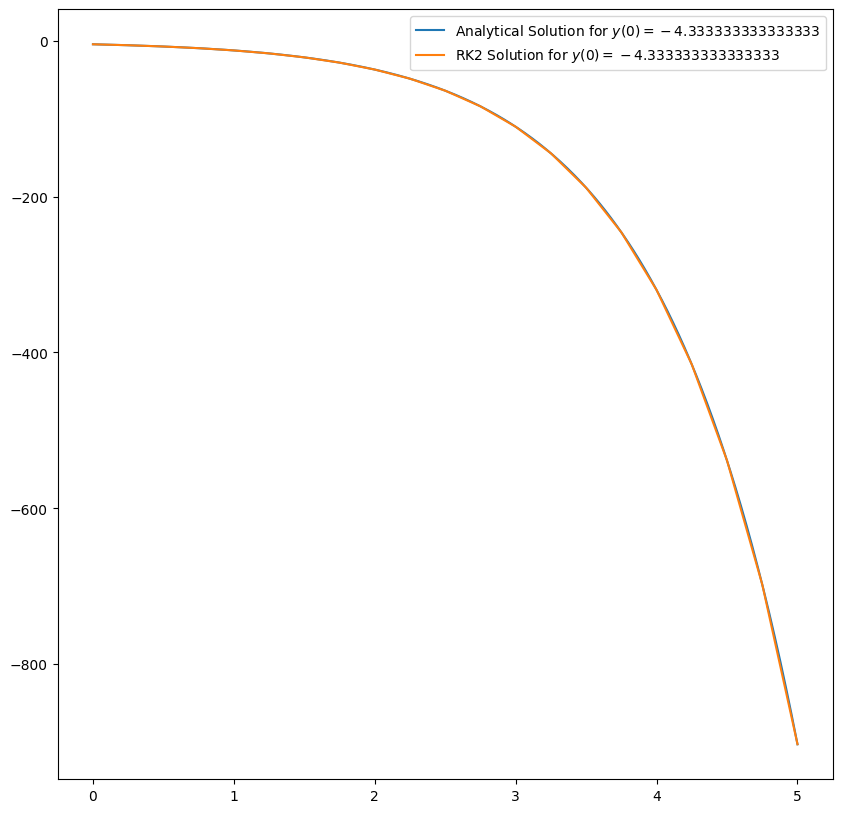

In [17]:
y0 = (2/3) - 5
x0 = 0
x1 = 5
h = 0.25
xsample = np.linspace(x0, x1, 500)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(xsample, sol2(xsample, y0), label=f"Analytical Solution for $y(0) = {y0}$")
ys, xs = RK4(f2, y0, x0, x1, h)
ax.plot(xs, ys, label=f"RK2 Solution for $y(0) = {y0}$")
y0 += 1

ax.legend()
fig.savefig("varied_initial_vals_RK2.png")